In [19]:
# 1. Significant earthquakes since 2150 B.C.
# 1.1
import pandas as pd
Sig_Eqs = pd.read_csv('earthquakes.csv')
Sig_Eqs.groupby(Sig_Eqs['Country']).sum()['Total Deaths'].sort_values(ascending=0).head(10)

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\4216582212.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sig_Eqs.groupby(Sig_Eqs['Country']).sum()['Total Deaths'].sort_values(ascending=0).head(10)


Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

<Axes: xlabel='Year'>

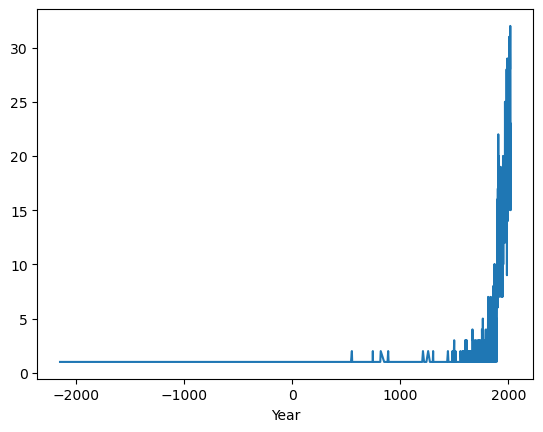

In [25]:
# 1.2
from matplotlib import pyplot as plt
Sig_Eqs.loc[Sig_Eqs['Mag']>6].groupby(Sig_Eqs['Year']).count()['Mag'].plot()

<Axes: xlabel='Year'>

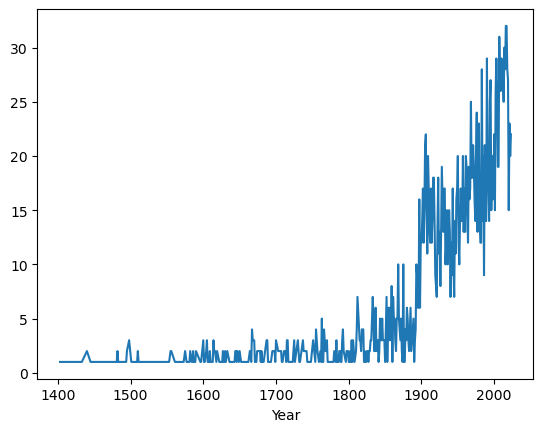

In [35]:
# Plot the time series from 15C to now to make the line clearer
Sig_Eqs.loc[Sig_Eqs['Mag']>6].loc[Sig_Eqs['Year']>1400].groupby(Sig_Eqs['Year']).count()['Mag'].plot()

In [239]:
# 1.3

def CountEq_LargestEq(country):
    
    Eqs_TotalNumber = Sig_Eqs.groupby(Sig_Eqs['Country']).count()['Id']
    Eqs_TotalNumber[country]
    
    reordered = Sig_Eqs.sort_values(['Country', 'Mag'], ascending=[1, 0])
    grouped = reordered.groupby(['Country'])
    largest = grouped.apply(lambda x: x.head(1))
    sort_country = largest.loc[largest['Country'] == country]
    sort_country['Date'] = sort_country['Year'].astype(str) + '/' + sort_country['Mo'].astype(int).astype(str) + '/' +  sort_country['Dy'].astype(int).astype(str)

    return Eqs_TotalNumber[country], sort_country['Date']

CountEq_LargestEq('CHINA')

# for EachCountry in largest['Country']:
#     try:
#         CountEq_LargestEq(EachCountry)
#     except:
#         pass


C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\3912245210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sort_country['Date'] = sort_country['Year'].astype(str) + '/' + sort_country['Mo'].astype(int).astype(str) + '/' +  sort_country['Dy'].astype(int).astype(str)


(620,
 Country     
 CHINA    981    1668/7/25
 Name: Date, dtype: object)

In [233]:
# reordered = Sig_Eqs.sort_values(['Country', 'Mag'], ascending=[1, 0])
# grouped = reordered.groupby(['Country'])
# largest = grouped.apply(lambda x: x.head(1))
# sort_country = largest.loc[largest['Country']=='CHINA']
# sort_country['Date'] = sort_country['Year'].astype(str) + '/' + sort_country['Mo'].astype(int).astype(str) + '/' +  sort_country['Dy'].astype(int).astype(str)
# sort_country['Date']

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\2308300360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sort_country['Date'] = sort_country['Year'].astype(str) + '/' + sort_country['Mo'].astype(int).astype(str) + '/' +  sort_country['Dy'].astype(int).astype(str)


Country     
CHINA    981    1668/7/25
Name: Date, dtype: object

In [240]:
# 2. Wind speed in Shenzhen during the past 10 years
import pandas as pd
wind = pd.read_csv('2281305.csv')
wind.loc[(wind['WND'].str.contains('N')) | (wind['WND'].str.contains('C'))].loc[wind['WND'].str[-1]=='1']

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\1175231357.py:3: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind = pd.read_csv('2281305.csv')


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
5,59493099999,2010-01-02T05:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET078METAR ZGSZ 020500Z 32005MPS 1800 R15/140...,FM-15,"99999,9",4,"+0170,1","001800,1,N,1","320,1,N,0050,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111977,59493099999,2020-09-11T15:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET052METAR ZGSZ 111500Z 16005MPS CAVOK 29/27 ...,FM-15,"99999,9",4,"+0290,1","009900,5,9,9","160,1,N,0050,1"
111978,59493099999,2020-09-11T16:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111600Z 17004MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0040,1"
111979,59493099999,2020-09-11T17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"


C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\391539478.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wind.groupby(['Year', 'Month']).mean()['WindSpeed'].plot(ylabel='Wind Speed (m/s)')


<Axes: xlabel='Year,Month', ylabel='Wind Speed (m/s)'>

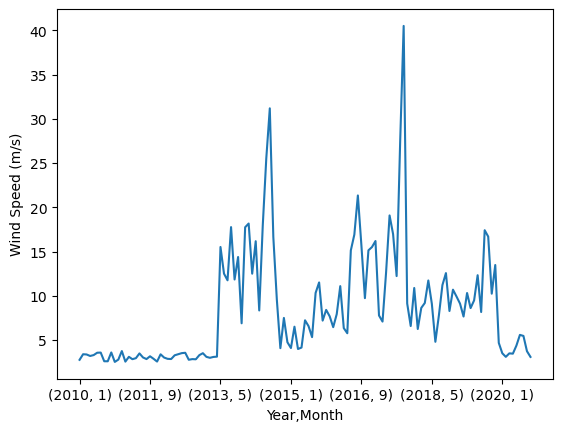

In [265]:
wind['Date'] = pd.to_datetime(wind['DATE']).dt.date
wind['Year'] = pd.to_datetime(wind['Date']).dt.year
wind['Month'] = pd.to_datetime(wind['Date']).dt.month

wind['WindSpeed'] = wind['WND'].str[8:12].astype(int)
wind.loc[(wind['WindSpeed']!=9999)]
wind['WindSpeed'] = wind['WindSpeed'] / 10

wind.groupby(['Year', 'Month']).mean()['WindSpeed'].plot(ylabel='Wind Speed (m/s)')

In [124]:
# 3. Explore a data set
GZ = pd.read_csv('CHM00059287.csv')
GZ = GZ.loc[GZ['TAVG']!=None]
GZ['realTAVG'] = GZ['TAVG'] / 10
GZ.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,realTAVG
0,CHM00059287,1945/11/30,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,107.0,"H,,S",10.7
1,CHM00059287,1945/12/1,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,123.0,"H,,S",12.3
2,CHM00059287,1945/12/2,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,136.0,"H,,S",13.6
3,CHM00059287,1945/12/3,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,152.0,"H,,S",15.2
4,CHM00059287,1945/12/4,23.217,113.483,71,"GUANGZHOU, CH",NaN,NaN,NaN,NaN,NaN,NaN,144.0,"H,,S",14.4


C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\3274507066.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GZ.groupby(['YEAR']).mean()['realTAVG'].plot(ylabel='AVERAGE TEMPERATURE')


<Axes: xlabel='YEAR', ylabel='AVERAGE TEMPERATURE'>

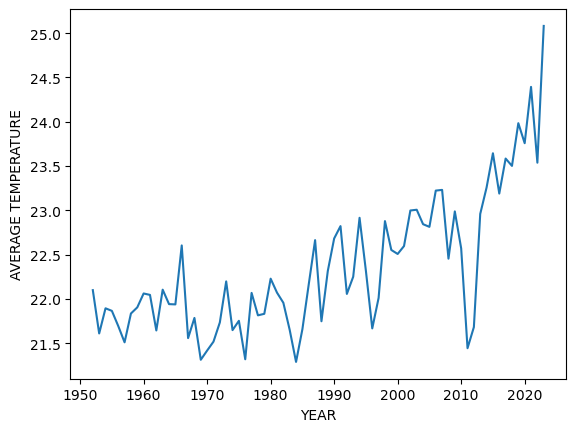

In [139]:
GZ['YEAR'] = pd.to_datetime(GZ['DATE']).dt.year
GZ = GZ.loc[GZ['YEAR']>=1952]
GZ.groupby(['YEAR']).mean()['realTAVG'].plot(ylabel='AVERAGE TEMPERATURE')

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\1151393886.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GZ.groupby(['YEAR']).median()['realTAVG'].plot(ylabel='MEDIAN of DAILY AVERAGE TEMPERATURE')


<Axes: xlabel='YEAR', ylabel='MEDIAN of DAILY AVERAGE TEMPERATURE'>

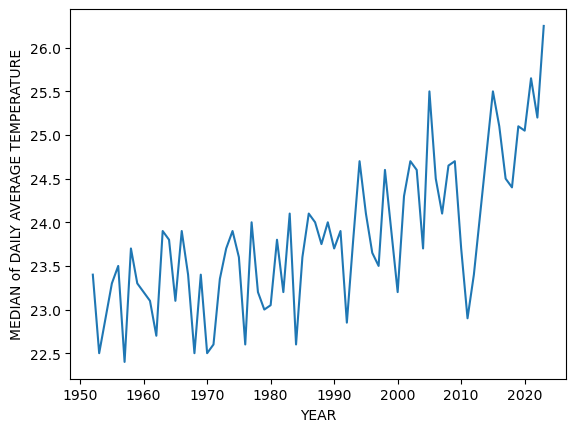

In [152]:
GZ.groupby(['YEAR']).median()['realTAVG'].plot(ylabel='MEDIAN of DAILY AVERAGE TEMPERATURE')

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\867758560.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  GZ.groupby(['YEAR']).min()['realTAVG'].plot(ylabel='MINIMUM DAILY AVERAGE TEMPERATURE')


<Axes: xlabel='YEAR', ylabel='MINIMUM DAILY AVERAGE TEMPERATURE'>

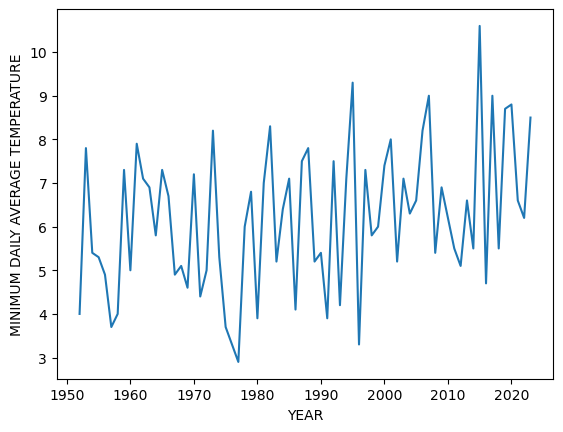

In [142]:
GZ.groupby(['YEAR']).min()['realTAVG'].plot(ylabel='MINIMUM DAILY AVERAGE TEMPERATURE')

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\1189171951.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  GZ.groupby(['YEAR']).max()['realTAVG'].plot(ylabel='MAXIMUM DAILY AVERAGE TEMPERATURE')


<Axes: xlabel='YEAR', ylabel='MAXIMUM DAILY AVERAGE TEMPERATURE'>

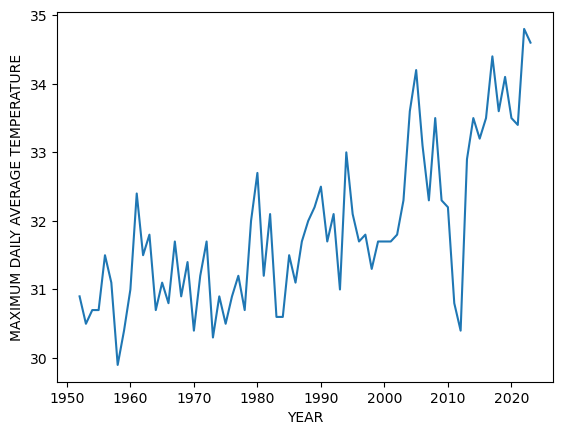

In [143]:
GZ.groupby(['YEAR']).max()['realTAVG'].plot(ylabel='MAXIMUM DAILY AVERAGE TEMPERATURE')

C:\Users\LZY\AppData\Local\Temp\ipykernel_19208\3321314209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  GZ.groupby(['YEAR']).std()['realTAVG'].plot(ylabel='STD of ANNUAL AVERAGE TEMPERATURE')


<Axes: xlabel='YEAR', ylabel='STD of ANNUAL AVERAGE TEMPERATURE'>

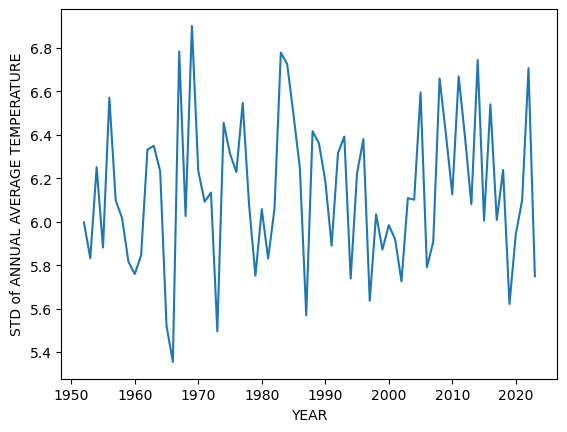

In [153]:
GZ.groupby(['YEAR']).std()['realTAVG'].plot(ylabel='STD of ANNUAL AVERAGE TEMPERATURE')